# tutorial on MNIST classification by Logistic Regression
## Procedure of applied ML
1. Preparation
    + Make the purpose (goal) clear.
    + Make the task concrete.
    + Check the possibilities to replace the existing services.
+ Prepare the dataset
+ Select a model
+ Continue learning, evaluation and tuning

# 1. preparation
- purpose: recognize a handwritten digit (NMIST classification)
    - [MNIST DATABASE of handwritten digits](http://yann.lecun.com/exdb/mnist/)

# 2. Prepare the dataset
- [fetch_openml](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html#sklearn.datasets.fetch_openml)
- [MNIST classification](https://www.openml.org/d/554)



In [1]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

X.shape =  (70000, 784)
y.shape =  (70000,)
len(X[0]) =  784
y[0] =  5


<Figure size 432x288 with 0 Axes>

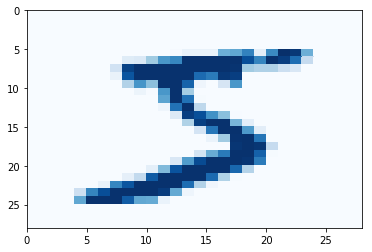

In [2]:
# check the shape of X and y
print('X.shape = ', X.shape)
print('y.shape = ', y.shape)

# check the length of sample (= # of dimensions)
print('len(X[0]) = ', len(X[0]))
print('y[0] = ', y[0])

# each feature represented by a vector that was transformed 28x28 field into 784 line.
# so, in order to show the vector on "field view", print the vector by 28x28 field.
def view_digit(one_vector, plt, x=28, y=28):
    plt.clf()
    temp = np.array(one_vector).reshape(x,y)
    fig, ax = plt.subplots()
    ax.invert_yaxis()
    ax.pcolor(temp, cmap=plt.cm.Blues)
    #plt.show()
    return plt

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plot = view_digit(X[0], plt)
plot.show()

# 3. Select a model
- [Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [3]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# 4. Continue learning, evaluation and tuning
- policy
    - divide the dataset into 2 sets, validation set and test set
    - in validation set, we try to tune the hyper params.
    - after that, we evaluate the optimum model with test set.
- ref.
    - [check_random_state](https://scikit-learn.org/stable/modules/generated/sklearn.utils.check_random_state.html#sklearn.utils.check_random_state)
    - [np.random.RandomState.permutation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.RandomState.html)

- 1st run
    - just apply Logistic Regression to dataset (half for train, remain for test)

In [4]:
from sklearn.utils import check_random_state
#validation_samples = int(X.shape[0] / 2)
use_samples = int(X.shape[0] / 100)
half = int(use_samples/2)
print('use_samples = ', use_samples)

# ready for permutated index for X
random_state = check_random_state(0)
permutation = random_state.permutation(use_samples)
X2 = X[permutation] # shuffled
y2 = y[permutation]

X_train, X_test = X2[:half], X2[half:use_samples]
y_train, y_test = y2[:half], y2[half:use_samples]
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

import time
t0 = time.time()
model.fit(X_train, y_train)
runtime = time.time() - t0
print('Example run in %.3f sec' % runtime)
print('precision: ', model.score(X_test, y_test))

use_samples =  700
(350, 784) (350, 784)
(350,) (350,)
Example run in 0.100 sec
precision:  0.84


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


- 2nd run
    - apply "standlization" to the each features.
    - [standardization](https://en.wikipedia.org/wiki/Feature_scaling#Standardization)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


<Figure size 432x288 with 0 Axes>

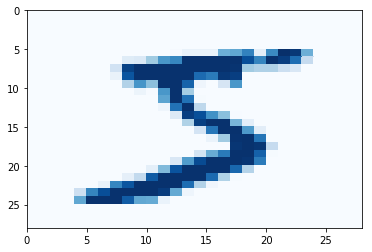

<Figure size 432x288 with 0 Axes>

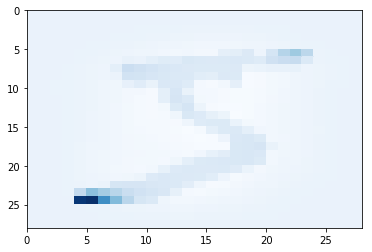

In [5]:
def apply_standarization(data):
    #result = np.c_[np.zeros(data.shape[0])]
    result = []
    #print('result.shape = ', result.shape)
    for i in range(data.shape[1]):
        #print('i = ', i)
        average = data[:,i].sum() / data.shape[0]
        std = np.std(data[:,i])
        #print('average = ', average, 'std = ', std)

        #data[0:,i] = (data[0:,i] - average) / std
        temp = (data[0:,i] - average) / std
        np.nan_to_num(temp, 0)
        #print(temp[0:3])
        #print('temp.shape = ', temp.shape)
        #print('result.shape = ', result.shape)
        #result = np.hstack([result, temp])
        result.append(temp)
    #result = np.array(result).reshape(data.shape)
    result = np.array(result).T
    return result

temp_X = apply_standarization(X)
plot = view_digit(X[0], plt)
plot.show()
plot = view_digit(temp_X[0], plt)
plot.show()

In [6]:
X2_train, X2_test = temp_X[:half], temp_X[half:use_samples]
model.fit(X2_train, y_train)
print('precision: ', model.score(X2_test, y_test))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


precision:  0.11142857142857143


- 3rd run
    - change the penalty term from l2 to l1

In [7]:
model = LogisticRegression(penalty='l1')
model.fit(X_train, y_train)
print('precision: ', model.score(X_test, y_test))

precision:  0.8142857142857143


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


- 4th run
    - change the hyper param 'C'.

In [8]:
Cs = [1e+2, 1e+1, 1e+0, 1e-1, 1e-2]
for c in Cs:
    model = LogisticRegression(penalty='l1', C=c)
    model.fit(X_train, y_train)
    print('precision(model:L1, C={}): {}'.format(c, model.score(X_test, y_test)))




precision(model:L1, C=100.0): 0.8285714285714286
precision(model:L1, C=10.0): 0.8428571428571429


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

precision(model:L1, C=1.0): 0.8228571428571428


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


precision(model:L1, C=0.1): 0.7885714285714286
precision(model:L1, C=0.01): 0.8


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [9]:
Cs = [7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 30, 40]
for c in Cs:
    model = LogisticRegression(penalty='l1', C=c)
    model.fit(X_train, y_train)
    print('precision(model:L1, C={}): {}'.format(c, model.score(X_test, y_test)))

precision(model:L1, C=7): 0.8342857142857143


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


precision(model:L1, C=8): 0.8342857142857143


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


precision(model:L1, C=9): 0.8514285714285714


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


precision(model:L1, C=10): 0.8314285714285714
precision(model:L1, C=11): 0.8571428571428571


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


precision(model:L1, C=12): 0.8485714285714285
precision(model:L1, C=13): 0.8257142857142857


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


precision(model:L1, C=14): 0.8428571428571429
precision(model:L1, C=15): 0.8428571428571429
precision(model:L1, C=20): 0.8371428571428572


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

precision(model:L1, C=30): 0.8314285714285714
precision(model:L1, C=40): 0.8285714285714286


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
